# Importing libraries and Data

In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
recipe_df = pd.read_csv("recipe_site_traffic_2212.csv") 
recipe_df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


## Basic Analysis

In [80]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [81]:
recipe_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
recipe,947.0,NaN,NaN,NaN,474.0,273.519652,1.0,237.5,474.0,710.5,947.0
calories,895.0,NaN,NaN,NaN,435.939196,453.020997,0.14,110.43,288.55,597.65,3633.16
carbohydrate,895.0,NaN,NaN,NaN,35.069676,43.949032,0.03,8.375,21.48,44.965,530.42
sugar,895.0,NaN,NaN,NaN,9.046547,14.679176,0.01,1.69,4.55,9.8,148.75
protein,895.0,NaN,NaN,NaN,24.149296,36.369739,0.0,3.195,10.8,30.2,363.36
category,947,11,Breakfast,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servings,947,6,4,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_traffic,574,1,High,574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
recipe_df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

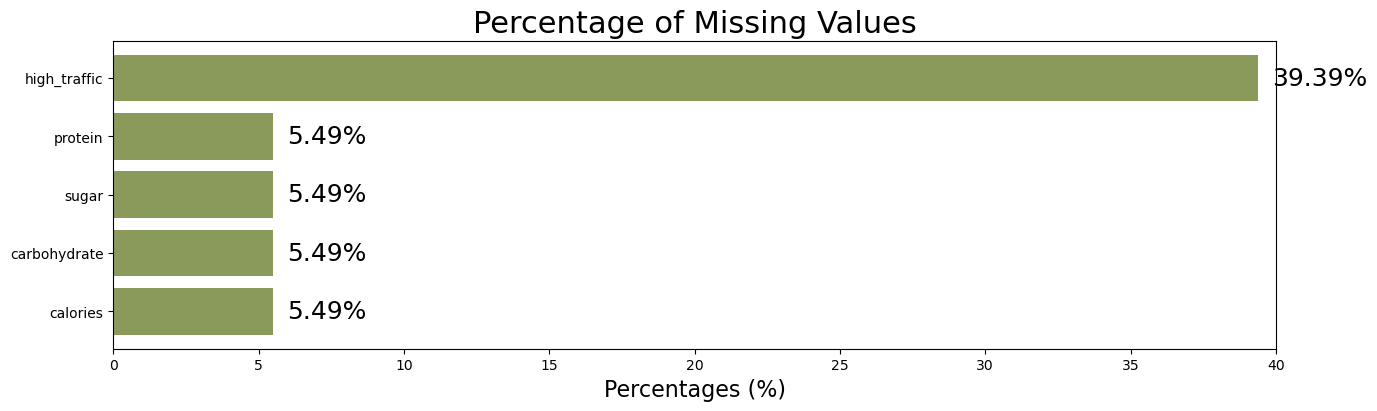

In [83]:
# Calculating the percentage of missing values for each column
missing_data = recipe_df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / recipe_df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#8a9a5b')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [84]:
recipe_df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [85]:
# we have to make a new category for missing values in high_traffic (Target Column)
recipe_df['high_traffic'] = recipe_df['high_traffic'].fillna('Low')

In [86]:
# Some numerical columns has missing values 5.4 % only so we are imputing it with mean of column
columns = ['calories', 'carbohydrate', 'sugar', 'protein']

for column in columns:
    recipe_df[column] = recipe_df[column].fillna(round(recipe_df[column].mean(), 2))

In [87]:
recipe_df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.94,35.07,9.05,24.15,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
943,944,435.94,35.07,9.05,24.15,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [88]:
recipe_df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

## Exploratory Analysis

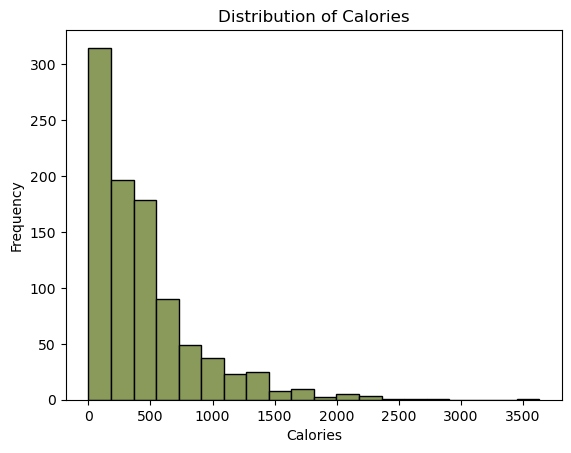

In [89]:
plt.hist(recipe_df['calories'], bins=20, color='#8a9a5b', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

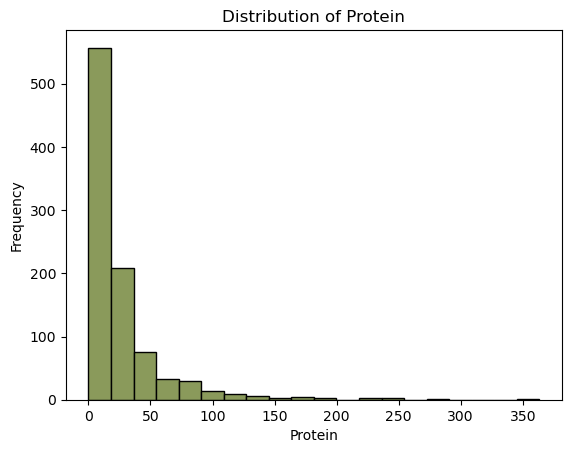

In [90]:
plt.hist(recipe_df['protein'], bins=20, color='#8a9a5b', edgecolor='black')
plt.xlabel('Protein')
plt.ylabel('Frequency')
plt.title('Distribution of Protein')
plt.show()

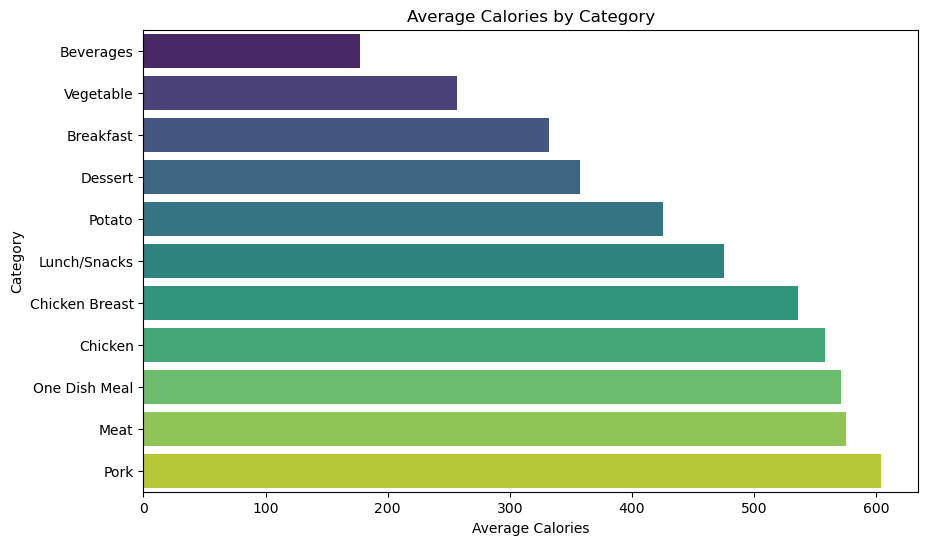

In [91]:
avg_calories_category = recipe_df.groupby('category')['calories'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_calories_category.values, y=avg_calories_category.index, palette='viridis')
plt.xlabel('Average Calories')
plt.ylabel('Category')
plt.title('Average Calories by Category')
plt.show()

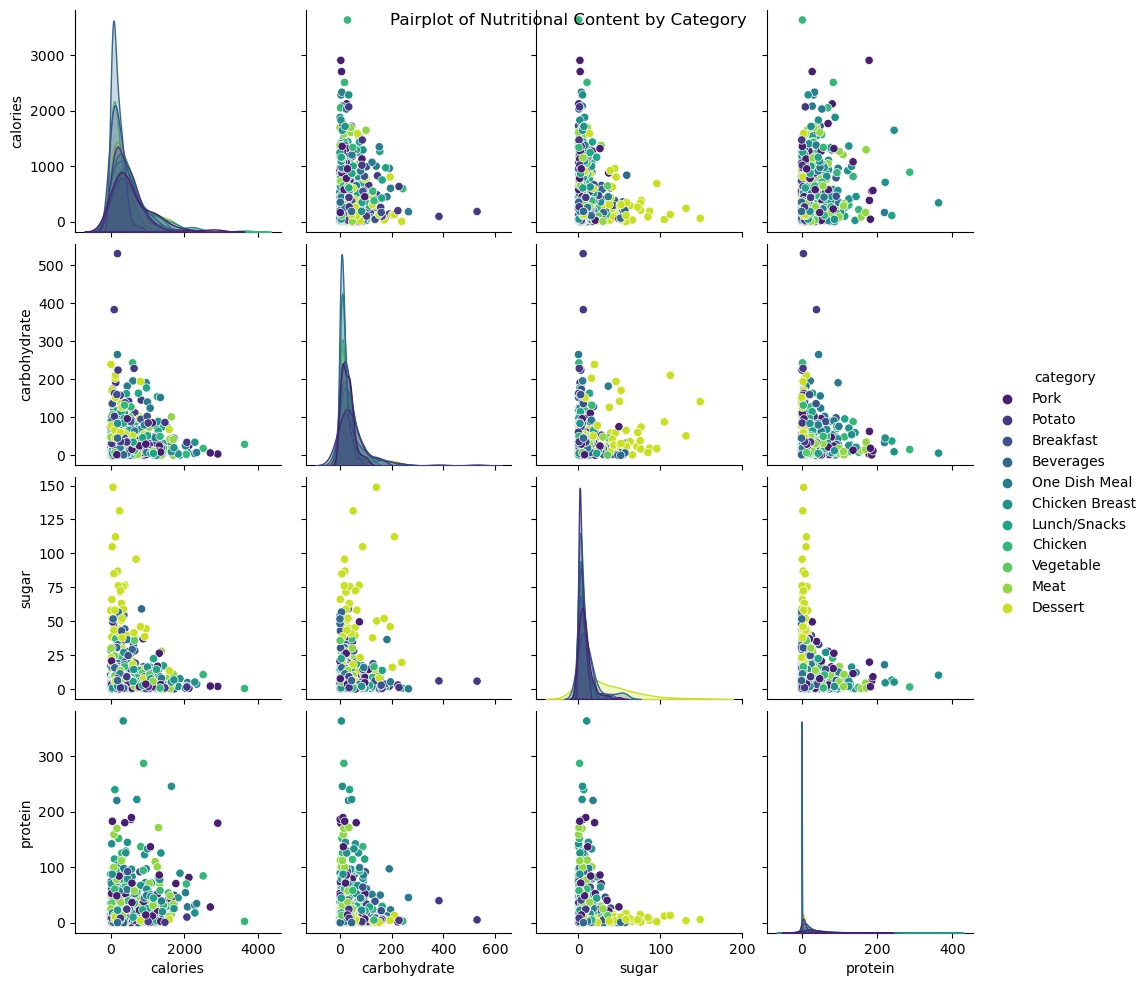

In [92]:
sns.pairplot(recipe_df, vars=['calories', 'carbohydrate', 'sugar', 'protein'], hue='category', palette='viridis')
plt.suptitle('Pairplot of Nutritional Content by Category')
plt.savefig('capir.png')
plt.show()

**Pair Plot Analysis of Nutritional Content by Category**

The pair plot provides a comprehensive visualization of the nutritional content across different food categories. It highlights potential correlations and outliers. Here's a breakdown of the insights gleaned from the plot:

1. **Protein and Calories**:
   - There appears to be a positive correlation between protein content and calories. Foods with higher protein content tend to have higher calorie content. Also chicken breast stands out as having both high protein and calorie content which indicats this is a dense source of nutrition.

2. **Sugar and Carbohydrates**:
   - Sugar content seems to exhibit a positive correlation with carbohydrates. Categories like breakfast beverages demonstrate a concentrated presence of both sugar and carbohydrates which suggests a significant contribution to the overall carbohydrate intake from sugars in these beverages.

3. **Fat Content**:
   - The plot does not distinctly reveal a correlation between fat content and other nutritional variables. Further analysis or additional data may be necessary to ascertain any potential relationships involving fat content.

Overall, the pair plot suggests potential positive correlations between protein and calories, as well as sugar and carbohydrates. However, the presence of outliers indicates variability within each category, emphasizing the importance of further data exploration to validate these trends conclusively.

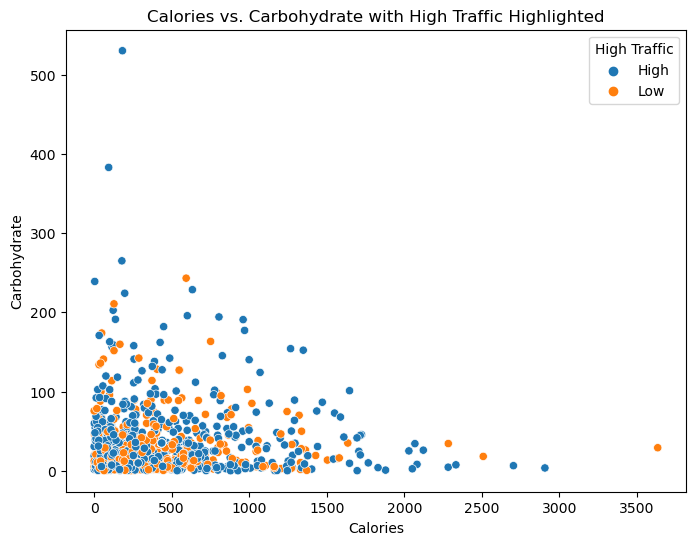

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='calories', y='carbohydrate', hue='high_traffic', data=recipe_df)
plt.xlabel('Calories')
plt.ylabel('Carbohydrate')
plt.title('Calories vs. Carbohydrate with High Traffic Highlighted')
plt.legend(title='High Traffic')
plt.show()

##  Pre-Processing

In [94]:
## Making cateorical column int.
# Get unique category names
unique_categories = recipe_df['category'].unique()
# Create a dictionary comprehension to map category names to integer values
category_mapping = {category: i for i, category in enumerate(unique_categories)}

traffic_mapping = {'High': 1, 'Low': 0}

# Map the 'high_traffic' column using the defined mapping
recipe_df['high_traffic'] = recipe_df['high_traffic'].map(traffic_mapping)

# Map the category column using the defined mapping
recipe_df['category'] = recipe_df['category'].map(category_mapping)

# mapping '4 as a snack' with 3 and '6 as a snack' with 5 in the 'servings' column
# Then, convert the column to integers
recipe_df['servings'] = recipe_df['servings'].replace({'4 as a snack': 3, '6 as a snack': 5}).astype('int64')

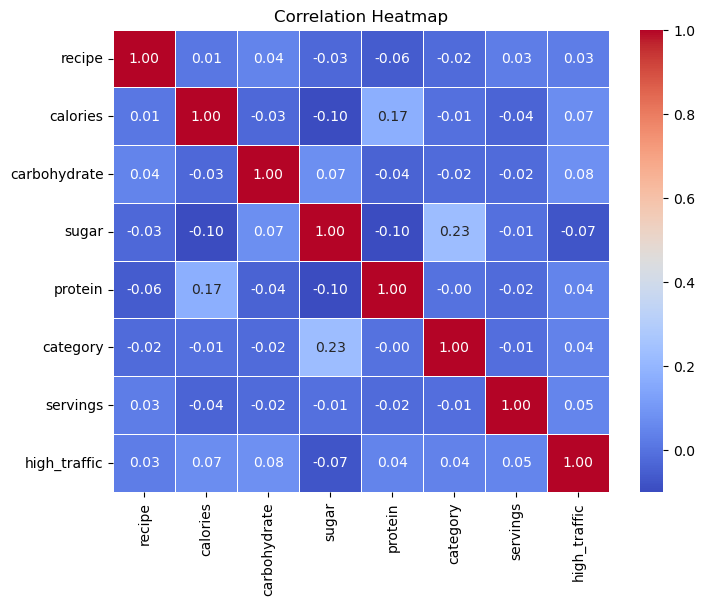

In [95]:
# Calculate the correlation matrix
correlation_matrix = recipe_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Model Development

In [96]:
# Define your features (X) and target variable (y)
X = recipe_df.drop(columns=['high_traffic']) # input Features
y = recipe_df['high_traffic']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

Accuracy: 0.6105263157894737
Precision: 0.595998192201816
Recall: 0.6105263157894737
F1 Score: 0.4934738220571891


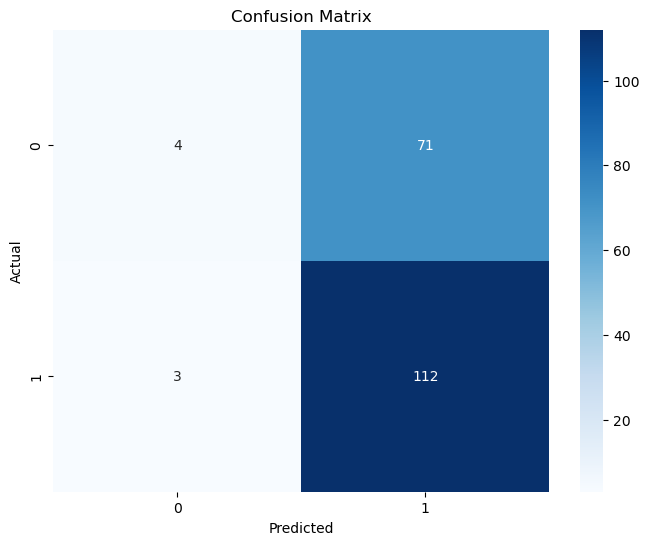

In [97]:
from sklearn.linear_model import LogisticRegression

# Create a Random Forest classifier
model_lr =  LogisticRegression()

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
precision = metrics.precision_score(y_test, y_pred_lr, average='weighted')
recall = metrics.recall_score(y_test, y_pred_lr, average='weighted')
f1 = metrics.f1_score(y_test, y_pred_lr, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7315789473684211
Precision: 0.7290726817042607
Recall: 0.7315789473684211
F1 Score: 0.7298065412982199


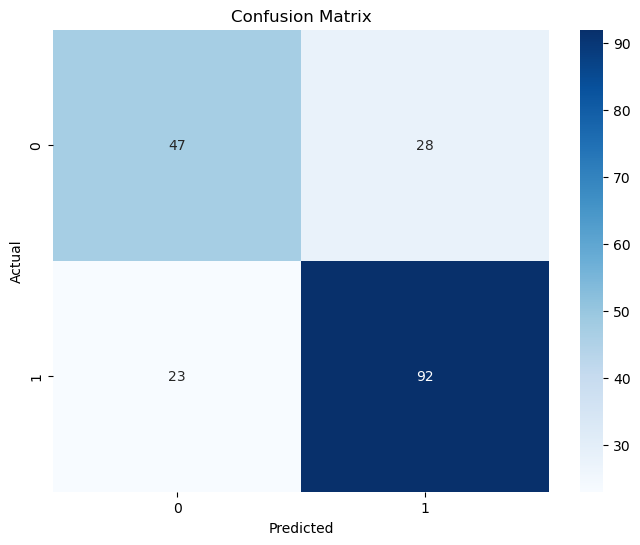

In [98]:
# Create a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=49)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
precision = metrics.precision_score(y_test, y_pred_rf, average='weighted')
recall = metrics.recall_score(y_test, y_pred_rf, average='weighted')
f1 = metrics.f1_score(y_test, y_pred_rf, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7421052631578947
Precision: 0.7397556390977444
Recall: 0.7421052631578947
F1 Score: 0.7404023632080936


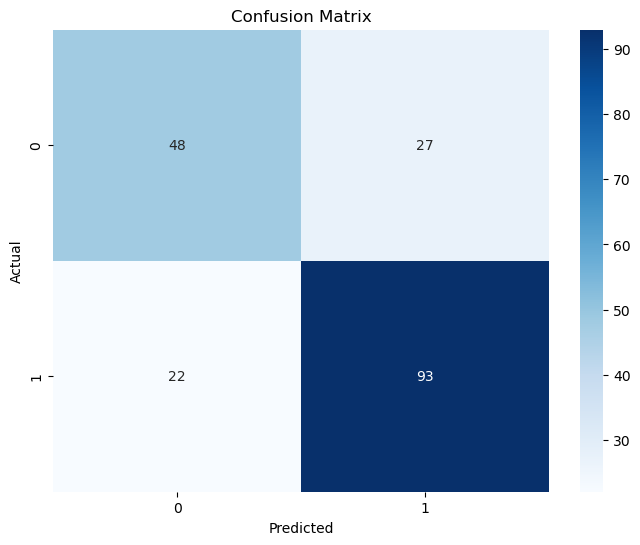

In [99]:
# Create a Gradient Boosting classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=49)

# Fit the model to the training data
model_gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_gb)
precision = metrics.precision_score(y_test, y_pred_gb, average='weighted')
recall = metrics.recall_score(y_test, y_pred_gb, average='weighted')
f1 = metrics.f1_score(y_test, y_pred_gb, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()